In [2]:
import numpy as np
import glob
import multiprocessing as mp
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
mean_matrix = np.load('../data/mean_matrix.npy')
std_matrix = np.load('../data/std_matrix.npy')
max_standard = np.load('../data/max_standard_matrix.npy')
min_standard = np.load('../data/min_standard_matrix.npy')

In [4]:
files = glob.glob('/prog40/192/*gz')
# files = files[::5]

In [5]:
def load_array(gz_file):
    file = np.loadtxt(gz_file).astype('float32')
    return file

In [6]:
length_750 = []

with mp.Pool(processes=32) as pool:
    results = list(tqdm(pool.imap(load_array, files), total=len(files)))
    for result in results:
        length_750.append(result)

100%|██████████| 99999/99999 [00:21<00:00, 4568.84it/s]


In [7]:
# length_750 = np.round(length_750, 2)

mean_matrix = np.mean(length_750, axis=0)
std_matrix = np.std(length_750, axis=0)
std_matrix = np.round(std_matrix, 3)
std_matrix[std_matrix == 0] = 1e-5

In [44]:
length_750_max = np.max(length_750, axis=0)
length_750_min = np.min(length_750, axis=0)
# np.save('../data/max_expected_distances.npy', length_750_max)

In [8]:
np.save('../data/mean_matrix_192.npy', mean_matrix)
np.save('../data/std_matrix_192.npy', std_matrix)

In [11]:
length_750_standard = (length_750 - mean_matrix) / std_matrix

In [13]:
max_standard = np.max(length_750_standard, axis=0)
min_standard = np.min(length_750_standard, axis=0)

In [29]:
np.save('../data/max_standard_matrix_192.npy',max_standard)
np.save('../data/min_standard_matrix_192.npy',min_standard)

In [23]:
denominator = max_standard - min_standard
denominator[denominator == 0] = 1

In [24]:
scaled_data = 2 * (length_750_standard - min_standard) / (denominator) - 1

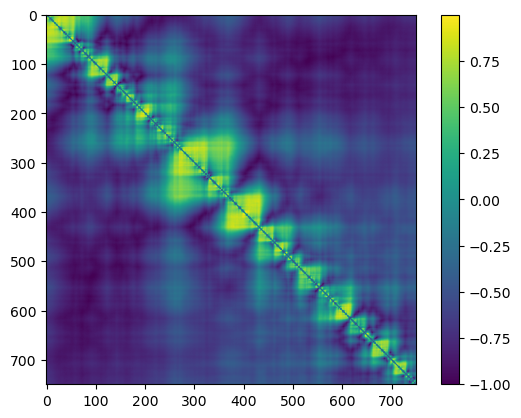

In [25]:
import matplotlib.pyplot as plt


plt.imshow(scaled_data[1000])
plt.colorbar()

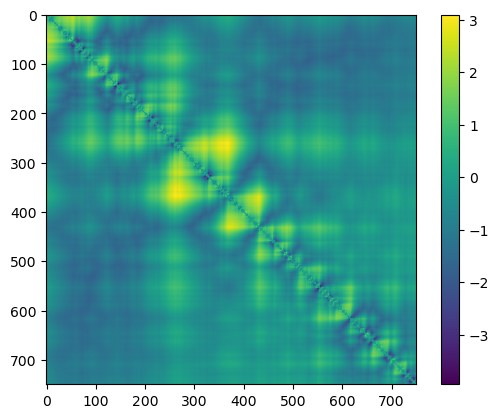

In [26]:
import matplotlib.pyplot as plt


plt.imshow(length_750_standard[1000])
plt.colorbar()

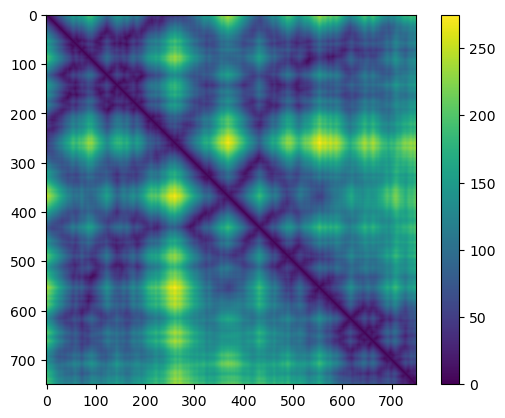

In [27]:
plt.imshow(length_750[1000])
plt.colorbar()

In [45]:
length_10 = np.loadtxt('/home/bnovak/projects/VAE_training/random_walk_pretraining/200/distance_matrices_000002.gz')

In [46]:
length_10_standard = (length_10 - mean_matrix[:200,:200]) / std_matrix[:200,:200]

In [50]:
length_10_scaled = 2 * (length_10_standard - min_standard[:200,:200])/(denominator[:200,:200]) -1

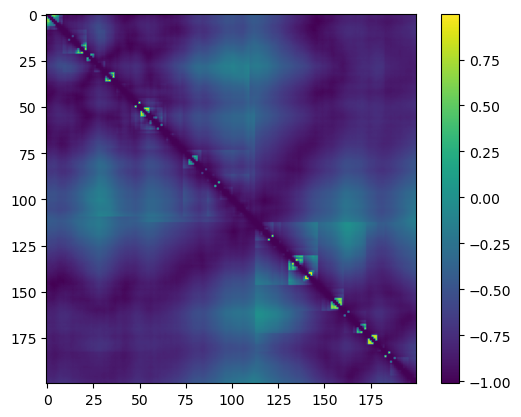

In [54]:
plt.imshow(length_10_scaled)
plt.colorbar()

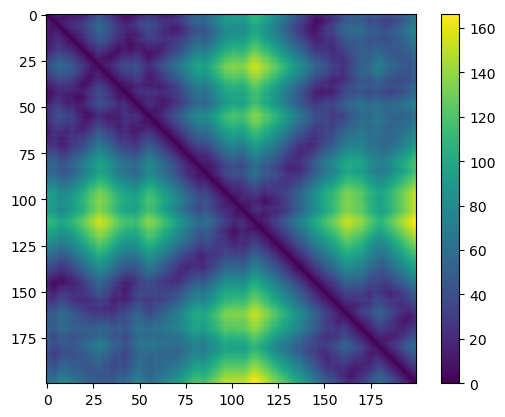

In [52]:
plt.imshow(length_10)
plt.colorbar()

In [9]:
def normalize_and_scale(original_array):
    height, width = original_array.shape
    standardized_data = (
        original_array - mean_matrix[:height, :width]
    ) / std_matrix[:height, :width]

    denominator = (
        max_standard[:height, :width] - min_standard[:height, :width]
    )
    denominator[denominator == 0] = 1

    scaled_data = (
        (standardized_data - min_standard[:height, :width]) / (denominator)
    )

    return scaled_data

In [10]:
files = glob.glob('/home/bnovak/projects/VAE_training/random_walk_pretraining/400/*')

test = [np.loadtxt(i) for i in files]

In [14]:
test_scaled = np.array([normalize_and_scale(i) for i in test])

In [18]:
test_scaled.min()

-0.3086801971243805

: 

In [56]:
length_750_max[length_750_max == 0] =1

In [57]:
test_norm = test / length_750_max[:10,:10]

In [63]:
length_750_max[:10,:10][0]

array([ 1.       ,  3.810023 ,  7.6199913, 11.426166 , 15.222188 ,
       18.957075 , 22.686766 , 26.254305 , 29.81772  , 33.46192  ],
      dtype=float32)

In [89]:
test_scaled.max()

1.1403306666659854

In [68]:
test_norm[400][0]

array([0.        , 0.99999395, 0.86148904, 0.70516167, 0.71511132,
       0.6869364 , 0.73641753, 0.73660267, 0.76624513, 0.76075389])

In [58]:
np.std(test_norm, axis=0)[0]

array([0.00000000e+00, 3.58824077e-08, 5.21781589e-02, 8.12515594e-02,
       9.88042553e-02, 1.15052394e-01, 1.31420325e-01, 1.45392615e-01,
       1.56556449e-01, 1.68645096e-01])

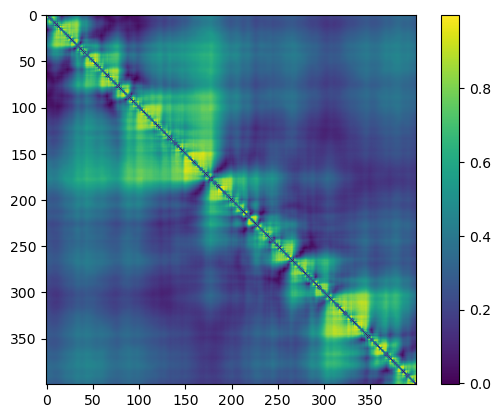

In [90]:
plt.imshow(test_scaled[99])
plt.colorbar()

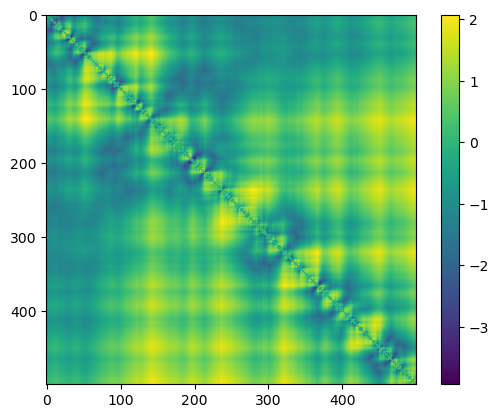

In [59]:
plt.imshow(test_scaled[100])
plt.colorbar()

In [20]:
length_750

NameError: name 'length_750' is not defined

In [15]:
np.where(np.array(test_scaled) == np.max(test_scaled, axis=0).max())

(array([17, 17]), array([227, 228]), array([228, 227]))

In [40]:
np.array(test_scaled).max()

1.3137108492550298

In [65]:
np.where(np.std(test_scaled, axis=0) == np.std(test_scaled, axis=0).max())

(array([226, 228]), array([228, 226]))

In [67]:
test_scaled[226,228]

TypeError: list indices must be integers or slices, not tuple

In [49]:
denominator = (
    length_750_max[:500, :500] - length_750_min[:500, :500]
)
denominator[denominator == 0] = 1

scaled_data = (
    2 * (test - length_750_min[:500, :500]) / (denominator)
    - 1
)

1.3137108492550298